In [1]:
# Annie Polish
# Summer 2019

import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

print("Hello imports")

Hello imports


In [16]:
FLY = pd.read_csv("./FLY088.csv", sep=",", header=0)

/home/annie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1011) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#RTKDATA
RTKDATA_LON_P = FLY["rtkdata:Lon_P"]
RTKDATA_LAT_P = FLY["rtkdata:Lat_P"]

#Onboard GPS
GPS0_LONG = FLY["GPS(0):Long"]
GPS0_LAT  = FLY["GPS(0):Lat"]
GPS1_LONG = FLY["GPS(1):Long"]
GPS1_LAT  = FLY["GPS(1):Lat"]
GPS2_LONG = FLY["GPS(2):Long"]
GPS2_LAT  = FLY["GPS(2):Lat"]

In [18]:
while(math.isnan(RTKDATA_LON_P.values[0]) or RTKDATA_LON_P.values[0] == 0):
    RTKDATA_LON_P.drop(RTKDATA_LON_P.head(1).index, inplace=True)
    RTKDATA_LAT_P.drop(RTKDATA_LAT_P.head(1).index, inplace=True)

41.31933296552589
-72.92136803446074
41.31930083176113
-72.92143591681784


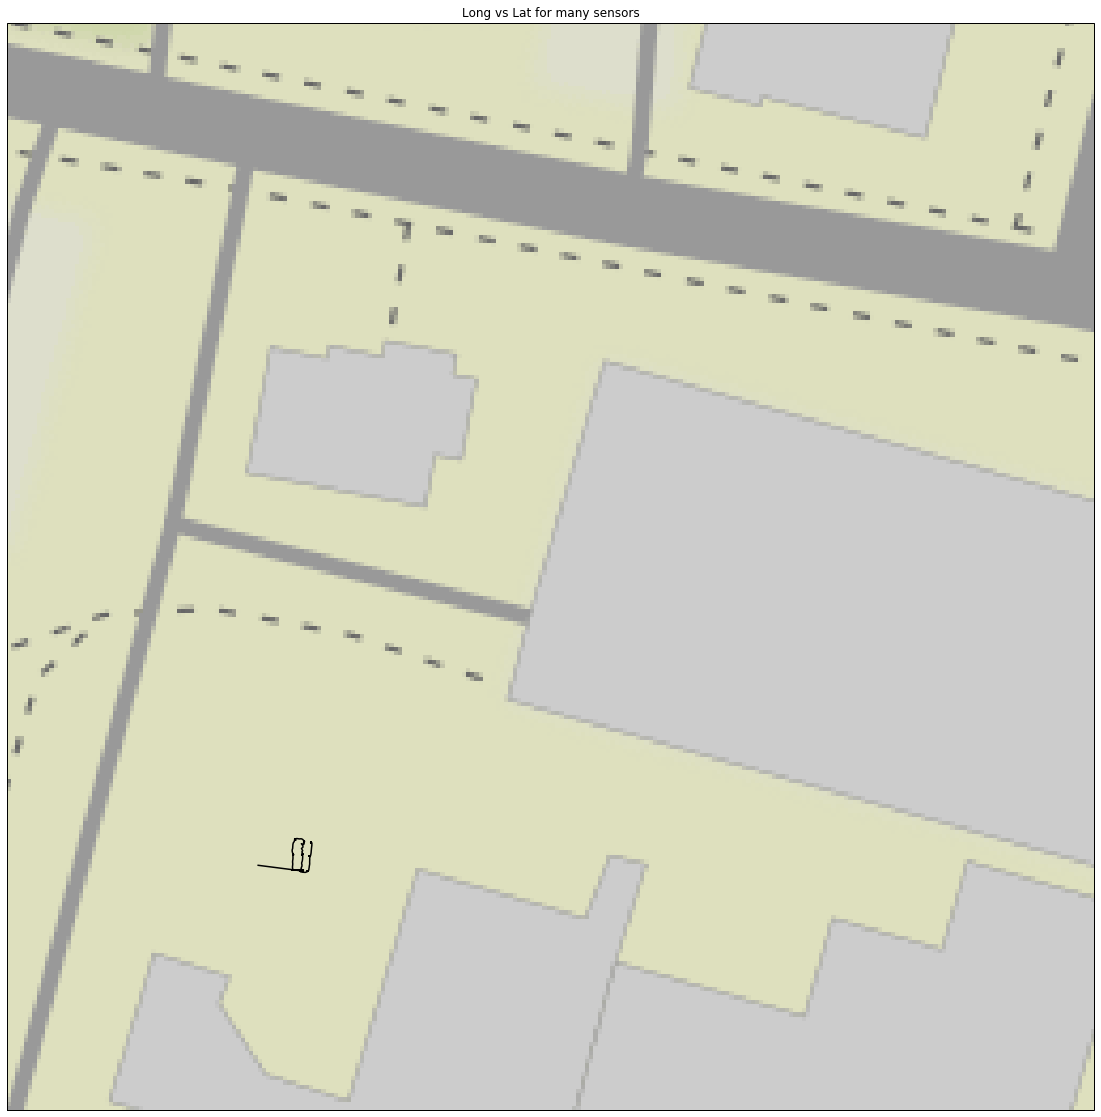

In [20]:
stamen_terrain = cimgt.Stamen('terrain')
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
#ax.set_extent([min(RTKDATA_LON_P.values), max(RTKDATA_LON_P.values), min(RTKDATA_LAT_P.values), max(RTKDATA_LAT_P.values)], crs=ccrs.Geodetic())
ax.add_image(stamen_terrain, 18)
print(max(RTKDATA_LAT_P.values))
print(max(RTKDATA_LON_P.values))
print(min(RTKDATA_LAT_P.values))
print(min(RTKDATA_LON_P.values))
ax.plot(RTKDATA_LON_P, RTKDATA_LAT_P, 'k', transform=ccrs.Geodetic())
#ax.plot(GPS0_LONG, GPS0_LAT, 'm:', transform=ccrs.Geodetic())
#ax.plot(GPS1_LONG, GPS1_LAT, 'c:', transform=ccrs.Geodetic())
#ax.plot(GPS2_LONG, GPS2_LAT, 'y:', transform=ccrs.Geodetic())
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Long vs Lat for many sensors")
plt.grid()
plt.show()